### 实验内容
1.利用傅里叶变换，将时间域内的语音信号变换到频率域；或者将频率域的语音信号变换到时间域；  
2.观察时间域和频率域语音信号的特点。

在语音信号处理中，常常使用时间域和频率域分析方法来研究和处理语音信号。这两个领域提供了不同的视角和工具，有助于理解和操作语音信号。

1. **时间域分析(Time Domain Analysis)**：
   - 时间域分析关注声音信号在时间上的变化。它包括对语音波形的振幅随时间的变化进行分析，通常以采样点或时间单位来表示。
   - 常见的时间域分析方法包括波形图、包络线、过零率、短时能量、自相关函数等。
   - 时间域分析用于检测语音信号中的基本音素、语速、音调、音强度等信息。

2. **频率域分析(Frequency Domain Analysis)**：
   - 频率域分析关注声音信号在频域上的特性，即声音信号中包含的不同频率成分。
   - 傅里叶变换是常用的频率域分析工具，它将声音信号从时间域转换为频率域，提供频谱信息。
   - 频率域分析用于分析语音信号的共振峰、谐波结构、频谱包络以及声音中的特定频率成分。

在语音信号处理中，时间域和频率域分析通常相互补充，用于不同的任务和应用，例如：
- 时间域分析可用于语音识别中的声学特征提取，如短时能量和过零率。
- 频率域分析可用于语音识别中的声学特征提取，如倒谱系数和Mel频谱系数。
- 时间域和频率域信息可用于语音合成、语音增强、语音编解码等任务。

综合使用时间域和频率域分析技术有助于深入理解语音信号的特性，提高语音处理任务的性能。

In [21]:
import wave
import numpy as np
from scipy import fft

def read_wave(file_path):
    file = wave.open(file_path, "rb")
    params = file.getparams()
    # getparams 返回格式信息元组(nchannels, sampwidth, framerate, nframes, comptype, compname)
    nchannels, sampwidth, framerate, nframes = params[:4]
    # 读取声音数据 nframes个采样点
    data = file.readframes(nframes)
    file.close()
    # 数据转换 frombuffer将data以流的形式读入转化成ndarray对象
    wave_data = np.frombuffer(data, dtype=np.short)
    # 对应声道转换
    wave_data = wave_data.reshape(-1,nchannels)
    wave_data = wave_data.T
    wave_data = np.squeeze(wave_data)   #对单声道的音频数据压缩维度
    time_table = np.arange(0, nframes) * (1.0/framerate)
    return wave_data, time_table

# 快速傅里叶变换
def wave_fft(wave_data, time_table, time_range=(-1,-1), inverse=False):
    assert(len(time_range) == 2)
    nchannels = 2 if wave_data.shape[0] == 2 else 1 
    wave_data = wave_data.reshape(nchannels,-1)    #对音频数据维度规范化
    time_start, time_end = time_range
    fft_time = [time_table[i] for i in range(len(time_table)) if time_table[i] >= time_start and time_table[i] < time_end]
    fft_data = []
    for channel in range(nchannels):
        times = []
        datas = []
        for i in range(len(time_table)):
            if time_range == (-1,-1) or (time_table[i] >= time_start and time_table[i] < time_end):
                times.append(time_table[i])
                datas.append(wave_data[channel][i])
        res = fft.fft(datas) if not inverse else fft.ifft(datas)
        fft_data.append(res)
    fft_data = np.squeeze(fft_data)   #对单声道的音频数据压缩维度
    return fft_data, fft_time


傅里叶分析是将一个时间域信号转换为频率域信号的数学工具。它使用傅里叶变换公式来实现这一转换。以下是傅里叶分析的基本公式和推导过程：

1. **连续时间信号的傅里叶分析**：
   对于连续时间信号 $x(t)$，其傅里叶变换表示为：
   
   $$X(f) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi ft} dt$$

2. **离散时间信号的傅里叶分析**：
   对于离散时间信号 $x[n]$，其离散傅里叶变换（DFT）表示为：
   
   $$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j2\pi kn/N}$$



c:\Users\Henry\.conda\envs\deeplearn\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Henry\.conda\envs\deeplearn\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


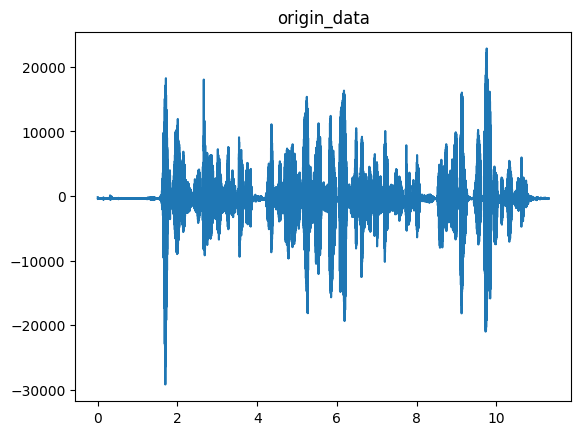

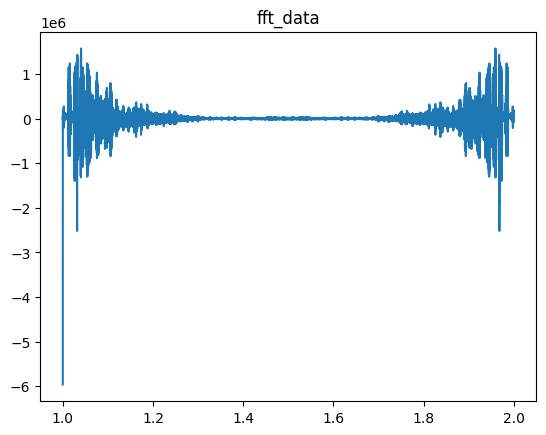

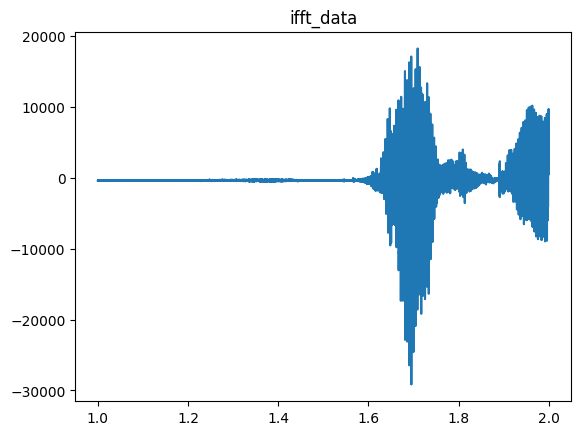

In [22]:
import matplotlib.pyplot as plt

wave_data, time_table = read_wave("./data/A2_8.wav")

wave_fft_data, time_fft_table = wave_fft(wave_data, time_table, (1,2))

wave_ifft_data, time_ifft_table = wave_fft(wave_fft_data, time_fft_table, (1,2), inverse=True)

plt.figure(1)
plt.title("origin_data")
plt.plot(time_table, wave_data)
plt.figure(2)
plt.title("fft_data")
plt.plot(time_fft_table, wave_fft_data)
plt.figure(3)
plt.title("ifft_data")
plt.plot(time_ifft_table, wave_ifft_data)
